<a href="https://colab.research.google.com/github/uzeziogho/MLDM/blob/main/Classifiers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, f1_score
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from pylab import *

In [ ]:
import seaborn as sns

from collections import Counter

In [ ]:
#Import dataset
class1= pd.read_csv('/content/Maternal Health Risk Data Set.csv')
class1.head()

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate,RiskLevel
0,25,130,80,15.0,98.0,86,high risk
1,35,140,90,13.0,98.0,70,high risk
2,29,90,70,8.0,100.0,80,high risk
3,30,140,85,7.0,98.0,70,high risk
4,35,120,60,6.1,98.0,76,low risk


In [ ]:
#Descriptive analysis of the dataset
kf=class1.copy()
class1.describe()

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate
count,1014.000000,1014.000000,1014.000000,1014.000000,1014.000000,1014.000000
mean,29.871795,113.198225,76.460552,8.725986,98.665089,74.301775
std,13.474386,18.403913,13.885796,3.293532,1.371384,8.088702
min,10.000000,70.000000,49.000000,6.000000,98.000000,7.000000
25%,19.000000,100.000000,65.000000,6.900000,98.000000,70.000000
50%,26.000000,120.000000,80.000000,7.500000,98.000000,76.000000
75%,39.000000,120.000000,90.000000,8.000000,98.000000,80.000000
max,70.000000,160.000000,100.000000,19.000000,103.000000,90.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fc1480a1520>,
      dtype=object)

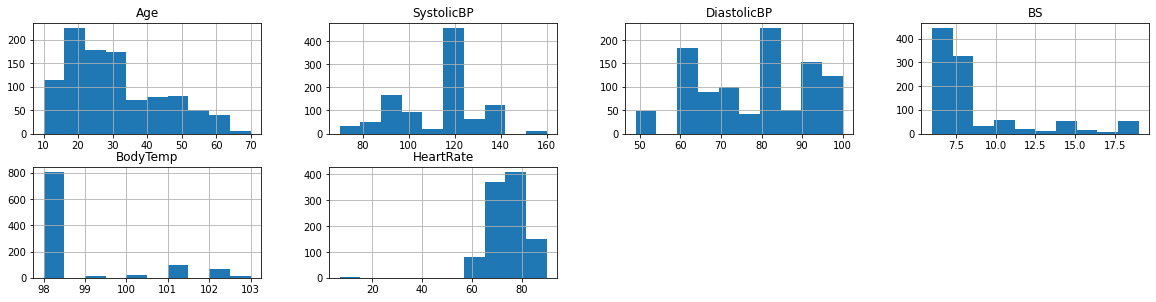

In [ ]:
#Plot all variables
class1.hist(layout=(4,4), figsize=(20,10))

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


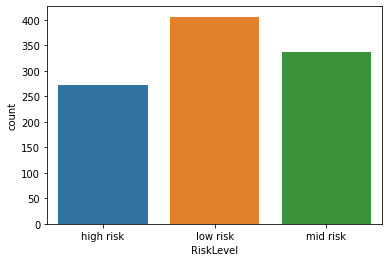

In [ ]:
#Plot an histogram to visualise the balance of the outcomes
sns.countplot(class1['RiskLevel'])

In [ ]:
class1['RiskLevel'].unique

<bound method Series.unique of 0       high risk
1       high risk
2       high risk
3       high risk
4        low risk
          ...    
1009    high risk
1010    high risk
1011    high risk
1012    high risk
1013     mid risk
Name: RiskLevel, Length: 1014, dtype: object>

In [ ]:
#Perform correlation between the variables
class1.corr(method='pearson')

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate,RiskLevel
Age,1.000000,0.416045,0.398026,0.473284,-0.255323,0.079798,0.267225
SystolicBP,0.416045,1.000000,0.787006,0.425172,-0.286616,-0.023108,0.396473
DiastolicBP,0.398026,0.787006,1.000000,0.423824,-0.257538,-0.046151,0.346649
BS,0.473284,0.425172,0.423824,1.000000,-0.103493,0.142867,0.569942
BodyTemp,-0.255323,-0.286616,-0.257538,-0.103493,1.000000,0.098771,0.163984
HeartRate,0.079798,-0.023108,-0.046151,0.142867,0.098771,1.000000,0.194312
RiskLevel,0.267225,0.396473,0.346649,0.569942,0.163984,0.194312,1.000000


In [ ]:
#Create dependent and independent vaariables
X = class1[['Age','SystolicBP','DiastolicBP','BodyTemp','BS','HeartRate']]
y = class1[['RiskLevel']]

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


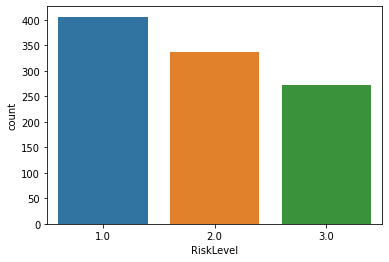

In [ ]:
# creating instance of labelencoder
#labelencoder = LabelEncoder()
# Assigning numerical values and storing in another column
#y = labelencoder.fit_transform(y_Risk.values.ravel())
sns.countplot(class1.RiskLevel)

In [ ]:
#split into training and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2,random_state=42)

In [ ]:
#Standardize and tranform the training and test independent data
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
# Algorithm: Decision Tree
from sklearn.tree import DecisionTreeClassifier
classifier= DecisionTreeClassifier(criterion = 'gini',random_state=42)
classifier.fit(X_train,y_train)

#predicting the test set results
y_pred=classifier.predict(X_test)
print(y_pred)
print(y_test)

[2. 3. 3. 1. 1. 2. 2. 2. 2. 1. 3. 2. 2. 3. 2. 2. 3. 1. 1. 2. 2. 2. 3. 3.
 3. 2. 3. 1. 1. 1. 2. 3. 1. 2. 1. 3. 3. 1. 1. 3. 3. 1. 3. 3. 1. 2. 3. 2.
 1. 1. 2. 1. 1. 2. 2. 2. 3. 1. 1. 2. 1. 2. 2. 1. 1. 3. 2. 3. 2. 3. 3. 3.
 2. 2. 2. 3. 3. 2. 3. 2. 1. 2. 1. 1. 2. 1. 1. 2. 3. 2. 2. 3. 1. 3. 2. 1.
 2. 1. 3. 2. 1. 2. 1. 1. 2. 2. 1. 2. 1. 2. 2. 2. 1. 3. 2. 1. 1. 3. 1. 3.
 2. 1. 1. 2. 3. 3. 2. 2. 2. 1. 1. 1. 2. 2. 1. 1. 3. 2. 1. 2. 3. 2. 3. 3.
 1. 1. 3. 1. 1. 2. 1. 2. 1. 2. 3. 2. 1. 2. 1. 2. 1. 1. 1. 2. 1. 2. 2. 2.
 1. 1. 3. 1. 2. 1. 2. 3. 2. 1. 1. 1. 3. 2. 1. 2. 3. 1. 3. 1. 2. 1. 2. 2.
 2. 2. 1. 2. 2. 3. 1. 2. 2. 2. 3.]
     RiskLevel
752        2.0
519        3.0
210        3.0
611        1.0
914        1.0
..         ...
370        1.0
381        2.0
780        2.0
760        2.0
682        3.0

[203 rows x 1 columns]


In [ ]:
cm=metrics.confusion_matrix(y_test,y_pred)
#print('accuracy:%.2f\n\n'%(acc))
print(metrics.accuracy_score(y_test, y_pred)*100)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

82.26600985221675
[[63 12  5]
 [ 9 64  3]
 [ 1  6 40]]
              precision    recall  f1-score   support

         1.0       0.86      0.79      0.82        80
         2.0       0.78      0.84      0.81        76
         3.0       0.83      0.85      0.84        47

    accuracy                           0.82       203
   macro avg       0.83      0.83      0.83       203
weighted avg       0.83      0.82      0.82       203



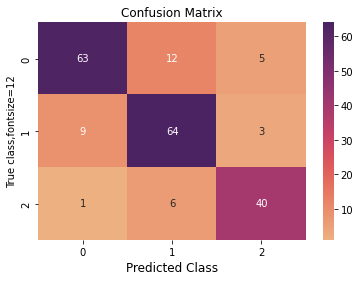

In [ ]:
ax=sns.heatmap(cm,cmap='flare',annot=True,fmt='d')

plt.xlabel("Predicted Class",fontsize=12)
plt.ylabel("True class,fontsize=12")
plt.title("Confusion Matrix",fontsize=12)
plt.show()

ax=sns.heatmap(cm,cmap='flare',annot=True,fmt='d')

plt.xlabel("Predicted Class",fontsize=12)
plt.ylabel("True class,fontsize=12")
plt.title("Confusion Matrix",fontsize=12)
plt.show()

In [ ]:
import tensorflow as tf

In [ ]:
#Dependencies
import keras
from keras.models import Sequential
from keras.layers import Dense

# creating instance of labelencoder
class1['RiskLevel'].replace({"high risk": "3", "mid risk": "2", "low risk" : "1"}, inplace=True)
class1['RiskLevel']=class1['RiskLevel'].astype(float)

X = class1.drop("RiskLevel", axis=1)
y = class1.RiskLevel

#Create train and test data for the model
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,stratify=y,random_state=99)
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.fit_transform(X_test)

# Use the AdamW optimizer with a learning rate of 0.001
optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)

# Neural network
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(8, input_shape=(6, ), activation='relu'))
#model.add(tf.keras.layers.Dense(16, activation='relu'))

# add a dropout layer with a rate of 0.5
model.add(tf.keras.layers.Dropout(0.5))

# add a batch normalization layer
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential_34"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_81 (Dense)            (None, 8)                 56        
                                                                 
 dropout_6 (Dropout)         (None, 8)                 0         
                                                                 
 batch_normalization_6 (Batc  (None, 8)                32        
 hNormalization)                                                 
                                                                 
 dense_82 (Dense)            (None, 1)                 9         
                                                                 
Total params: 97
Trainable params: 81
Non-trainable params: 16
_________________________________________________________________


In [ ]:
# Import the class_weight module from sklearn
from sklearn.utils import class_weight

In [ ]:
# Calculate class weights
#class_weights = {1:0.832,1:1.005,3:1.25}

history=model.fit(X_train,y_train,batch_size=64,epochs=100,verbose=2,validation_data=(X_test,y_test))

Epoch 1/100
13/13 - 1s - loss: 0.9136 - accuracy: 0.3009 - val_loss: 1.2166 - val_accuracy: 0.2167 - 916ms/epoch - 70ms/step
Epoch 2/100
13/13 - 0s - loss: 0.8217 - accuracy: 0.2959 - val_loss: 1.0892 - val_accuracy: 0.2315 - 62ms/epoch - 5ms/step
Epoch 3/100
13/13 - 0s - loss: 0.7462 - accuracy: 0.2972 - val_loss: 0.9687 - val_accuracy: 0.2512 - 61ms/epoch - 5ms/step
Epoch 4/100
13/13 - 0s - loss: 0.6842 - accuracy: 0.2836 - val_loss: 0.8531 - val_accuracy: 0.2709 - 46ms/epoch - 4ms/step
Epoch 5/100
13/13 - 0s - loss: 0.6024 - accuracy: 0.2935 - val_loss: 0.7434 - val_accuracy: 0.2660 - 63ms/epoch - 5ms/step
Epoch 6/100
13/13 - 0s - loss: 0.5373 - accuracy: 0.3021 - val_loss: 0.6374 - val_accuracy: 0.2660 - 46ms/epoch - 4ms/step
Epoch 7/100
13/13 - 0s - loss: 0.4235 - accuracy: 0.2848 - val_loss: 0.5352 - val_accuracy: 0.2660 - 66ms/epoch - 5ms/step
Epoch 8/100
13/13 - 0s - loss: 0.3512 - accuracy: 0.2873 - val_loss: 0.4302 - val_accuracy: 0.2759 - 62ms/epoch - 5ms/step
Epoch 9/100
13

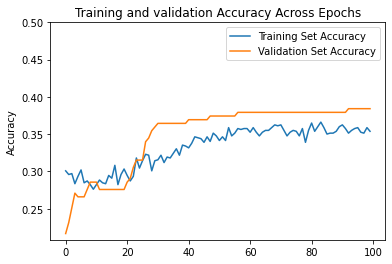

In [ ]:
accuracy=history.history['accuracy']
validation_accuracy=history.history['val_accuracy']

plt.plot(accuracy,label='Training Set Accuracy')
plt.plot(validation_accuracy,label='Validation Set Accuracy')
plt.ylabel('Accuracy')
plt.ylim([min(plt.ylim()),0.5])
plt.title('Training and validation Accuracy Across Epochs')
plt.legend()

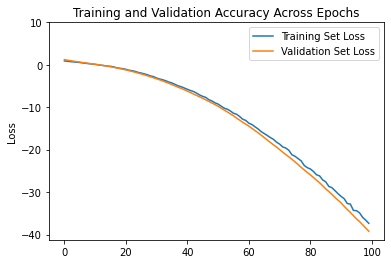

In [ ]:
loss=history.history['loss']
validation_loss=history.history['val_loss']

plt.plot(loss,label='Training Set Loss')
plt.plot(validation_loss,label='Validation Set Loss')
plt.ylabel('Loss')
plt.ylim([min(plt.ylim()),10])
plt.title('Training and Validation Accuracy Across Epochs')
plt.legend()

In [ ]:
y_pred=model.predict(X_test)
y_pred=y_pred.argmax(axis=1)

7/7 [==============================] - 0s 5ms/step


In [ ]:
# Make predictions on the test set
y_pred = model.predict(X_test)

# Adjust the decision threshold to optimize for the F1 score
threshold = 0.4
y_pred = (y_pred > threshold).astype(int)

# Calculate the F1 score
f1 = f1_score(y_test, y_pred,average='macro')

# Print the F1 score
print(f'F1 score: {f1:.3f}')


7/7 [==============================] - 0s 4ms/step
F1 score: 0.447


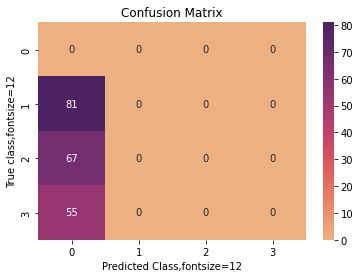

In [ ]:
cm=metrics.confusion_matrix(y_test,y_pred)

ax=sns.heatmap(cm,cmap='flare',annot=True,fmt='d')

plt.xlabel("Predicted Class,fontsize=12")
plt.ylabel("True class,fontsize=12")
plt.title("Confusion Matrix",fontsize=12)
plt.show()

In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00       0.0
         1.0       0.00      0.00      0.00      81.0
         2.0       0.00      0.00      0.00      67.0
         3.0       0.00      0.00      0.00      55.0

    accuracy                           0.00     203.0
   macro avg       0.00      0.00      0.00     203.0
weighted avg       0.00      0.00      0.00     203.0



/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1